In [1]:
import numpy as np
import networkx as nx
GRQC = nx.read_edgelist("C:/Users/Think/Documents/CSE291F/CA-GrQc.txt")

In [2]:
GCC1 = max(nx.connected_component_subgraphs(GRQC), key=len)
GCC2 = max(nx.connected_component_subgraphs(GRQC), key=len)

In [5]:
import random
def randomDeletion():
    nodes = GCC1.nodes()
    tmpRandom = random.randint(0, len(nodes)-1)
    GCC1.remove_node(nodes[tmpRandom])
    
    
def targetedDeletion():
    degrees = dict(GCC2.degree())
    sortedDegrees = sorted(degrees, key=lambda x:degrees[x], reverse=True)
    GCC2.remove_node(sortedDegrees[0])

In [6]:
result1 = [4158]
result2 = [4158]
result3 = [0]
result4 = [0]
x = [0.0]
for i in range(1, 832):
    randomDeletion()
    targetedDeletion()
    tmp1 = len(list(max(nx.connected_component_subgraphs(GCC1), key=len).nodes()))
    tmp2 = len(list(max(nx.connected_component_subgraphs(GCC2), key=len).nodes()))
    result1.append(tmp1)
    result2.append(tmp2)
    result3.append(len(GCC1.nodes())-tmp1)
    result4.append(len(GCC2.nodes())-tmp2)
    x.append(i * 1.0 / 4158)

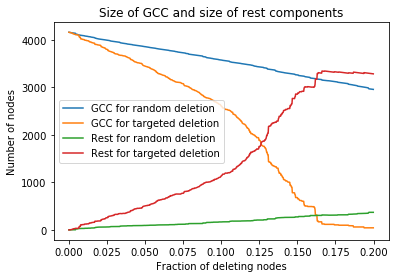

In [7]:
import matplotlib.pyplot as plt
plt.plot(x, result1, label="GCC for random deletion")
plt.plot(x, result2, label="GCC for targeted deletion")
plt.plot(x, result3, label="Rest for random deletion")
plt.plot(x, result4, label="Rest for targeted deletion")
plt.title("Size of GCC and size of rest components")
plt.ylabel("Number of nodes")
plt.xlabel("Fraction of deleting nodes")
plt.legend()
plt.savefig("deletionNodes.png")
plt.show()